Giá trị T-critical (df=29): 2.0452


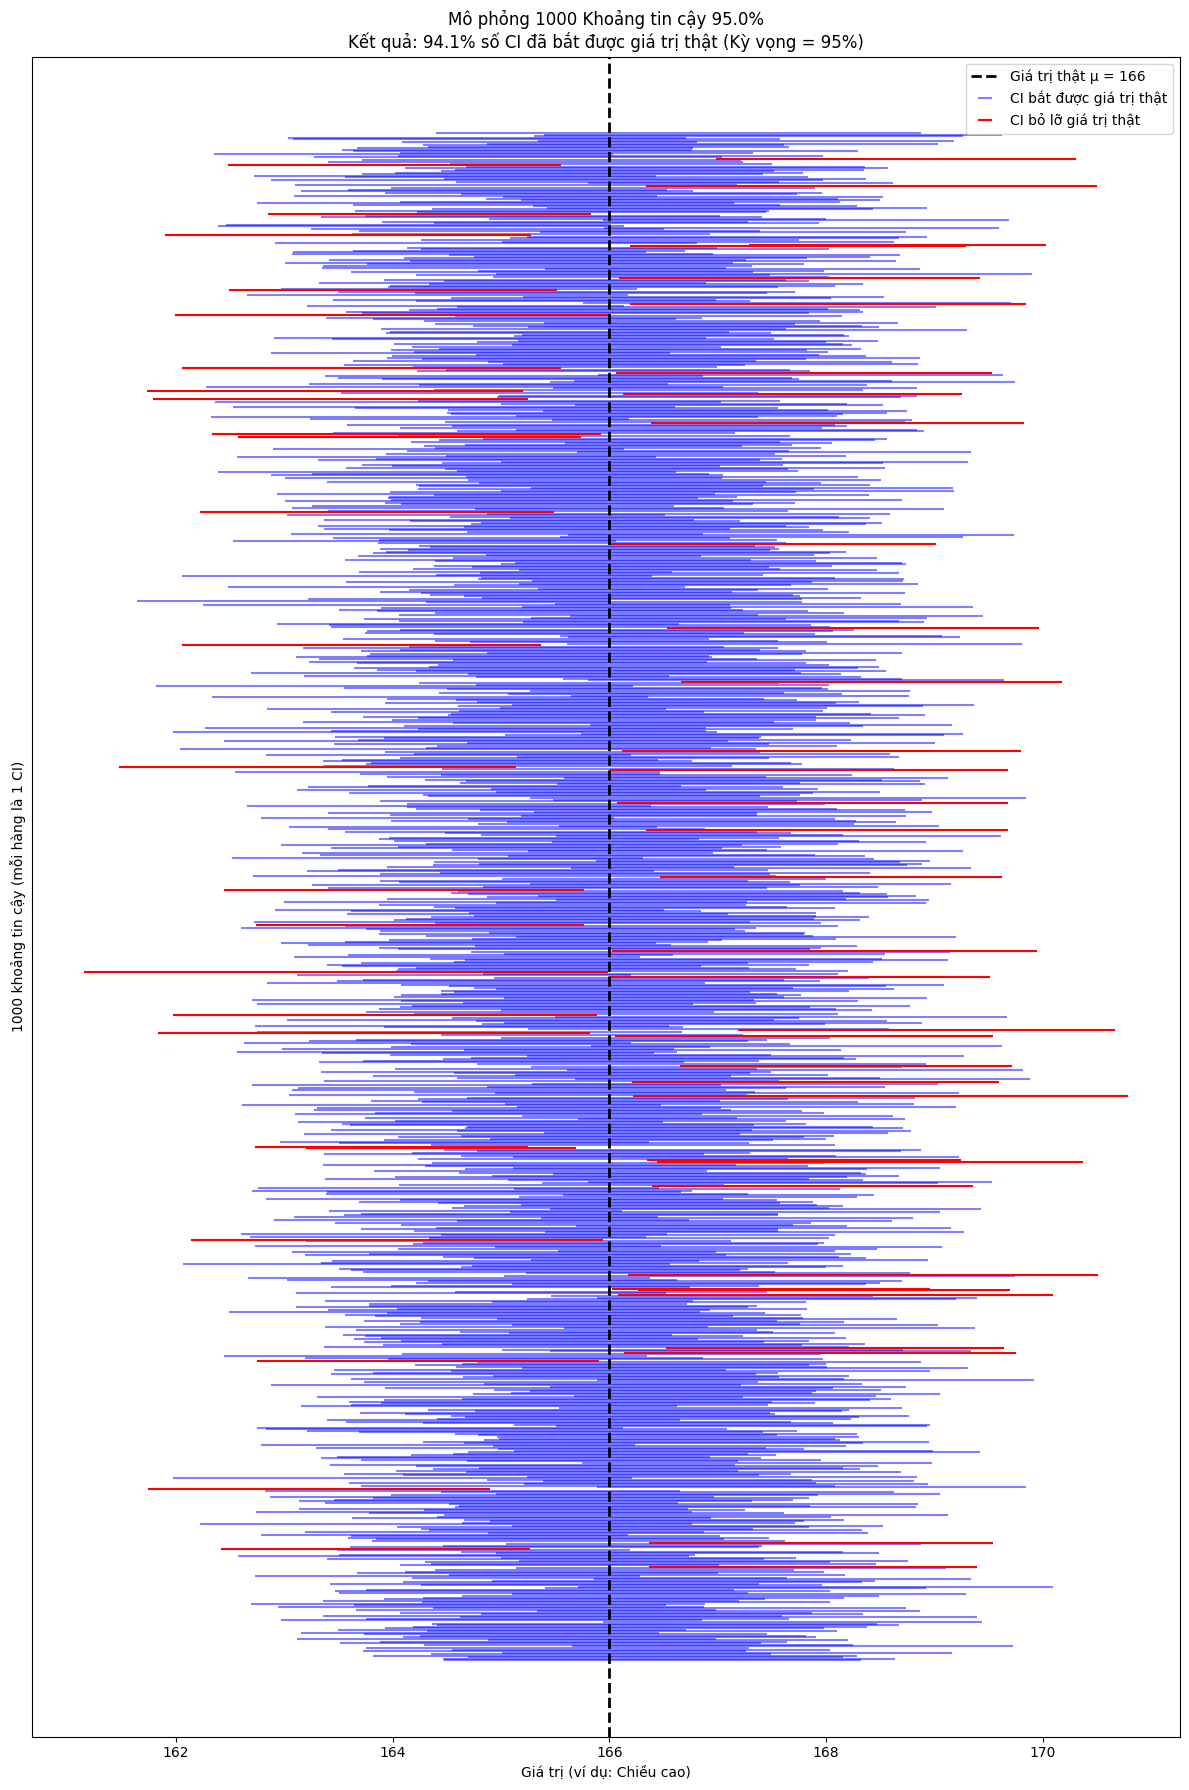

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# --- 1. Thiết lập các thông số (Giả định) ---

POPULATION_MEAN = 166  # Giá trị "thật" của tổng thể (μ)
POPULATION_STD = 5     # Độ lệch chuẩn "thật" của tổng thể (σ)

N_SAMPLES = 30         # Kích thước của MỖI mẫu (n=30)
N_SIMULATIONS = 1000   # Số lần mô phỏng (tính 1000 CIs)
CONFIDENCE_LEVEL = 0.95 # Mức tin cậy

# Tính giá trị t-critical (dùng t-distribution vì chúng ta dùng std mẫu)
# (chỉ cần tính 1 lần vì N_SAMPLES không đổi)
alpha = 1 - CONFIDENCE_LEVEL
degrees_freedom = N_SAMPLES - 1
t_critical = t.ppf(1 - alpha / 2, df=degrees_freedom)

print(f"Giá trị T-critical (df={degrees_freedom}): {t_critical:.4f}")

# --- 2. Chạy mô phỏng ---

captured_count = 0
missed_cis_data = [] # (mean, margin_of_error, y_position)
captured_cis_data = [] # (mean, margin_of_error, y_position)

for i in range(N_SIMULATIONS):
    # 1. Lấy mẫu ngẫu nhiên từ tổng thể "thật"
    sample = np.random.normal(loc=POPULATION_MEAN, scale=POPULATION_STD, size=N_SAMPLES)
    
    # 2. Tính toán thống kê mẫu
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1) # Dùng ddof=1 cho độ lệch chuẩn MẪU
    
    # 3. Tính toán biên sai số (Margin of Error - ME)
    margin_of_error = t_critical * (sample_std / np.sqrt(N_SAMPLES))
    
    # 4. Tính khoảng tin cậy (CI)
    ci_low = sample_mean - margin_of_error
    ci_high = sample_mean + margin_of_error
    
    # 5. Kiểm tra xem CI có "bắt" được giá trị thật không
    if ci_low <= POPULATION_MEAN <= ci_high:
        captured_count += 1
        captured_cis_data.append((sample_mean, margin_of_error, i))
    else:
        missed_cis_data.append((sample_mean, margin_of_error, i))

# --- 3. Vẽ hình ---

# Tạo biểu đồ với kích thước đủ cao
plt.figure(figsize=(12, 18))

# Tách dữ liệu để vẽ
# Các CI "bắt" đúng (màu xanh)
if captured_cis_data:
    cap_means, cap_mes, cap_y = zip(*captured_cis_data)
    plt.errorbar(x=cap_means, y=cap_y, xerr=cap_mes, fmt='none', color='blue', alpha=0.5, label='CI bắt được giá trị thật')

# Các CI "bỏ lỡ" (màu đỏ)
if missed_cis_data:
    miss_means, miss_mes, miss_y = zip(*missed_cis_data)
    plt.errorbar(x=miss_means, y=miss_y, xerr=miss_mes, fmt='none', color='red', alpha=1.0, label='CI bỏ lỡ giá trị thật')

# Vẽ đường "Sự thật" (Population Mean)
plt.axvline(x=POPULATION_MEAN, color='black', linestyle='--', linewidth=2, label=f'Giá trị thật μ = {POPULATION_MEAN}')

# Tính toán tỷ lệ
percent_captured = (captured_count / N_SIMULATIONS) * 100

# Định dạng biểu đồ
plt.yticks([], []) # Ẩn 1000 con số trên trục Y cho đỡ rối
plt.xlabel('Giá trị (ví dụ: Chiều cao)')
plt.ylabel(f'{N_SIMULATIONS} khoảng tin cậy (mỗi hàng là 1 CI)')
plt.title(f"Mô phỏng {N_SIMULATIONS} Khoảng tin cậy {CONFIDENCE_LEVEL*100}%\n"
          f"Kết quả: {percent_captured:.1f}% số CI đã bắt được giá trị thật (Kỳ vọng = 95%)")
plt.legend(loc='upper right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()